In [29]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
sys.path.insert(0, '../src')
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Results from other Text Analyzers

To test the performance of our application <i> AutoLibrary </i>, we experiment it with three other text analyzers.

- AutoLibrary: Used AutoPhrase to extract phrases and keywords and assigns quality scores to each of them. Requires human labor to label quality scores.

- Jstor: https://www.jstor.org/analyze/. This search engine has its own text analyzer. It requires human labor to label quality scores.

- Webtools:  https://www.webtools.services/text-analyzer
    This website tool helps us find the frequency of phrases in a document. We then standardize it to form scores in range of 0 to 1.

- MonkeyLearn: https://monkeylearn.com/text-analyzer/
    This text analyzer extracts keywords from the document. It requires human labor to label quality scores.

## Computer Science

### Jstor

In [30]:
# score
jstor_cs_phrases = {"Psychotherapy": 0.99,
"Machine learning": 0.1,
"Text analytics": 0.95,
"Health care quality": 0.55,
"Academic aptitude": 0.3,
"Art therapy": 0.66,
"Big data": 0.5,
"Biomedical data": 0.55,
"Computer centers": 0.5,
"Audio engineering": 0.9,
"Code pages": 0.1,
"Compensatory education": 0.2,
"Computer programming": 0.9,
"Data analysis": 0.65,
"Data collection": 0.7,
"Educational technology": 0.3,
"Data transcription": 0.65,
"Data models": 0.8,
"Government information": 0.3,
"Health care utilization": 0.5,
"In state students": 0.1,
"Information attributes": 0.4,
"Learning": 0.1,
"Learning by doing": 0.1,
"Logistic regression": 0.7,
"Learning strategies": 0.1,
"Out of state students": 0.25,
"Psychological research": 0.95,
"Public health": 0.75,
"Speech acts": 0.7,
"School counseling": 0.6,
"Second language learning": 0.15,
"Student interests": 0.2,
"Students": 0.3,
"Time series": 0.75,
"Test theory": 0.6,
"Small area data": 0.6,
"Surveillance": 0.9,
"Time series forecasting": 0.8,
"ZIP codes": 0.2}

In [31]:
jstor_cs_labels = [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]

### AutoLibrary

In [32]:
dirs = os.listdir('../references/experiment data')
#dirs.remove('.DS_Store')
dirs

['Statistics',
 'Electrical Engineering and Systems Science',
 'Mathematics',
 'Quantitative Finance',
 'Economics',
 'Physics',
 'Quantitative Biology',
 'Computer Science']

In [33]:
weighted = {}
weighted_all = {}
weighted_stats = pd.DataFrame()
for directory in dirs:
    fp = '../references/experiment data/' + directory + '/weighted_AutoPhrase.csv'
    df = pd.read_csv(fp, index_col='Unnamed: 0')
    weighted_all[directory] = df
    weighted[directory] = df
    weighted_stats[directory] = df['score'].describe()
weighted_df = pd.concat(weighted, axis=1)
weighted_df.head(15)

Statistics           Electrical Engineering and Systems Science  \
              phrase     score                                     phrase   
0           post hoc  0.563277                         magnetic resonance   
1               chen  0.511308                              deep learning   
2                 uk  0.490869                                fine tuning   
3                lim  0.472009                                 multi coil   
4           appendix  0.459412                                   cine mri   
5            section  0.450614                                    ms ssim   
6                 ar  0.448357                        dictionary learning   
7                 pr  0.438766                                  cartesian   
8                law  0.432914                       network architecture   
9   asymptotic power  0.432416                                       ieee   
10         separable  0.428614                                 fine tuned   
11          gaussian  0.428142                       trainable parameters   
12                h2  0.425777                                         dc   
13            wilson  0.423929                                        mri   
14                ii  0.423105                                     radial   

                         Mathematics               Quantitative Finance  \
       score                  phrase     score                   phrase   
0   0.892167             state space  0.907407          price formation   
1   0.828240           initial state  0.876937  stochastic differential   
2   0.696476         policy gradient  0.825594                     game   
3   0.695884            lower bounds  0.820748               stochastic   
4   0.692821            upper bounds  0.760767                  control   
5   0.634603             upper bound  0.743966          market clearing   
6   0.627884              holds true  0.740892                    games   
7   0.581321             lower bound  0.740883            price process   
8   0.572861     policy optimization  0.739476         mean field games   
9   0.532896          crossing times  0.588507                financial   
10  0.529951  entropy regularization  0.519889             optimization   
11  0.528611    arxiv preprint arxiv  0.517943              probability   
12  0.527117              hypothesis  0.513784                       ce   
13  0.526679                 optimal  0.498468                      mfg   
14  0.525634                    long  0.497295                       hg   

                            Economics                        Physics  \
       score                   phrase     score               phrase   
0   0.492314       affirmative action  0.854857  gravitational field   
1   0.482875            school choice  0.765075   general relativity   
2   0.447040  incentive compatibility  0.723872    quantum mechanics   
3   0.434419                 american  0.513310        wave function   
4   0.418807                  college  0.500523       quantum theory   
5   0.412391                  journal  0.485510  gravitational waves   
6   0.412282             choice rules  0.476397           yang mills   
7   0.408539                    chile  0.437769         field theory   
8   0.408051                   review  0.429024             universe   
9   0.402997                 backward  0.419779          gravitation   
10  0.400598                       iv  0.419383                  ref   
11  0.390429                   public  0.418359              feynman   
12  0.381366                  section  0.403542             einstein   
13  0.377562                    india  0.399252           relativity   
14  0.372684                 economic  0.393846           conference   

             Quantitative Biology                        Computer Science  \
       score               phrase     score                        phrase   
0   0.892916       finite element  0.857318  

In [34]:
autophrase_cs_df = weighted_df['Computer Science'].dropna().head(100)
autophrase_cs_df

,phrase,score
0,mental health,0.917283
1,automatic speech recognition,0.876298
2,substance abuse,0.871875
3,machine learning,0.833653
4,speech recognition,0.684244
...,...,...
95,manual,0.394415
96,combined,0.393530
97,linguistic,0.392364
98,scale,0.391431


In [35]:
autophrase_cs_labels = [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                       0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Webtools

In [36]:
webtools_cs_phrases = {"of the": 74,
"et al": 45,
"to the": 36,
"in the": 28,
"for the": 27,
"in order": 15,
"the therapist": 15,
"and the": 15,
"in order to": 14,
"the system": 14,
"by the": 13,
"it is": 12,
"of a": 12,
"the session": 12,
"at the": 12,
"from the": 12,
"of psychotherapy": 11,
"able to": 11,
"with the": 10,
"we have": 10,
"we are": 10,
"is not": 10,
"the two": 10,
"between the": 10,
"university of": 9,
"in a": 9,
"has been": 9,
"behavioral coding": 9,
"of the system": 9,
"speech and": 8,
"more than": 8,
"is a": 8,
"as a": 8,
"a variety of": 8,
"in this": 8,
"based on": 8,
"the client": 8,
"to be": 8,
"using the": 8,
"automated evaluation": 7}

In [37]:
# standardize it
webtools_cs_phrases = utils.min_max_scale(webtools_cs_phrases)
webtools_cs_phrases

{'of the': 1.0,
 'et al': 0.5671641791044776,
 'to the': 0.43283582089552236,
 'in the': 0.31343283582089554,
 'for the': 0.29850746268656714,
 'in order': 0.11940298507462686,
 'the therapist': 0.11940298507462686,
 'and the': 0.11940298507462686,
 'in order to': 0.1044776119402985,
 'the system': 0.1044776119402985,
 'by the': 0.08955223880597014,
 'it is': 0.07462686567164178,
 'of a': 0.07462686567164178,
 'the session': 0.07462686567164178,
 'at the': 0.07462686567164178,
 'from the': 0.07462686567164178,
 'of psychotherapy': 0.05970149253731343,
 'able to': 0.05970149253731343,
 'with the': 0.04477611940298507,
 'we have': 0.04477611940298507,
 'we are': 0.04477611940298507,
 'is not': 0.04477611940298507,
 'the two': 0.04477611940298507,
 'between the': 0.04477611940298507,
 'university of': 0.029850746268656716,
 'in a': 0.029850746268656716,
 'has been': 0.029850746268656716,
 'behavioral coding': 0.029850746268656716,
 'of the system': 0.029850746268656716,
 'speech and': 0.0

In [38]:
webtools_cs_labels = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
len(webtools_cs_labels) == len(webtools_cs_phrases)

True

### MonkeyLearn

In [39]:
monkeylearn_cs_phrases = {"sessions": 0.45,
"codes": 0.1,
"utterances": 0.5,
"behavioral coding": 0.7,
"therapist": 0.65,
"international speech communication": 0.3,
"Automatic Speech Recognition": 0.9,
"speech communication association": 0.8,
"Proc": 0.1,
"psychotherapy": 0.95}

In [40]:
monkeylearn_cs_labels = [1, 0, 0, 1, 1, 1, 1, 1, 0, 1]

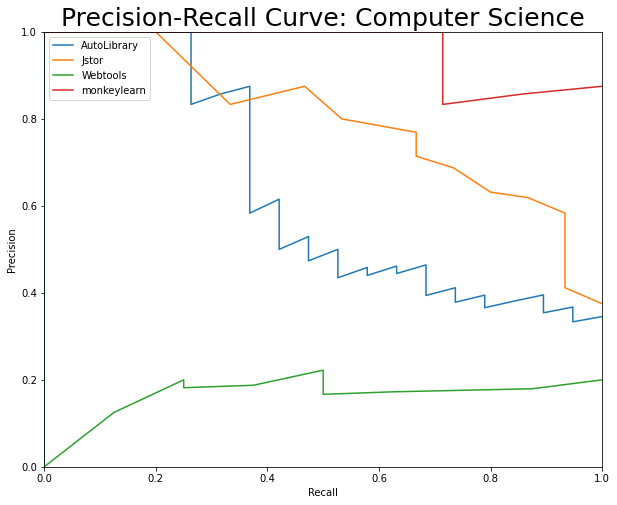

In [41]:
# graph
utils.graph_precision_recall(autophrase_cs_labels, autophrase_cs_df,
    jstor_cs_labels, jstor_cs_phrases, 
    webtools_cs_labels, webtools_cs_phrases,
    monkeylearn_cs_labels, monkeylearn_cs_phrases, "Computer Science")

## Economics

### AutoLibrary

In [42]:
autophrase_econ_df = weighted_df['Economics'].dropna().head(100)
autophrase_econ_df

,phrase,score
0,affirmative action,0.854857
1,school choice,0.765075
2,incentive compatibility,0.723872
3,american,0.513310
4,college,0.500523
...,...,...
95,assumption,0.249116
96,presented,0.248769
97,result,0.247104
98,min,0.244549


In [43]:
autophrase_econ_labels = [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 
                         0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
                         0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
                         1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
                         0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

### Jstor

In [45]:
# score
jstor_econ_phrases = {"Treaty lands": 0.1,
"Axiom of choice": 0.75,
"Test theory": 0.5,
"Affirmative action": 0.95,
"Indian history": 0.9,
"Antennas": 0.3,
"Caste system": 0.85,
"Casting": 0.2,
"Fire protection": 0.1,
"Cognitive dissonance": 0.5,
"Equal protection": 0.85,
"Environmental protection": 0.55,
"Genetic correlation": 0.35,
"Grammemes": 0.15,
"Legislative branch": 0.78,
"Incantations": 0.2,
"Caste determination": 0.6,
"Logistic regression": 0.65,
"Lost wax casting": 0.3,
"Neuroscience": 0.25,
"Multilevel models": 0.2,
"Medicaid": 0.5,
"Personality inventories": 0.45,
"Pro choice movements": 0.6,
"Rational choice theory": 0.7,
"Rule of 72": 0.75,
"Simplex method": 0.22,
"Transfer pricing": 0.85,
"Sundials": 0.2,
"Rule of 78": 0.75,
"School choice": 0.8,
"Ray tracing": 0.15,
"Product choice": 0.1,
"Plasticizers": 0.15,
"Preferential voting": 0.5,
"Recursion": 0.2,
"Rule of 70": 0.65,
"Self control": 0.7,
"Syntax": 0.5,
"Tribal constitutions": 0.7}

In [53]:
jstor_econ_labels = [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]

### Webtools

In [47]:
webtools_econ_phrases = {"choice rule": 101,
"of the": 58,
"hr protections": 36,
"set of": 34,
"i i": 33,
"of individuals": 28,
"in india": 26,
"sciakg choice rule": 26,
"in the": 25,
"set of individuals": 24,
"category v": 23,
"affirmative action": 22,
"is the":	21,
"can be":	21,
"justified envy": 21,
"the sciakg choice rule": 21,
"the set": 18,
"for every": 18,
"in section": 17,
"an individual": 17,
"m i": 17,
"individuals in": 16,
"v v": 16,
"merit score": 16,
"the set of": 16,
"meritorious horizontal": 16,
"2smh choice rule": 16,
"minimum guarantee": 15,
"number of": 15,
"sonmez and": 15,
"and yenmez": 15,
"meritorious horizontal choice rule": 15,
"c2s m": 15,
"et al": 15,
"a set": 14,
"the akghas": 14,
"hrprotected position": 14,
"the highest": 14,
"for the": 14,
"it is": 14,
}

In [48]:
# standardize it
webtools_econ_phrases = utils.min_max_scale(webtools_econ_phrases)
webtools_econ_phrases

{'choice rule': 1.0,
 'of the': 0.5057471264367817,
 'hr protections': 0.25287356321839083,
 'set of': 0.22988505747126436,
 'i i': 0.21839080459770116,
 'of individuals': 0.16091954022988506,
 'in india': 0.13793103448275862,
 'sciakg choice rule': 0.13793103448275862,
 'in the': 0.12643678160919541,
 'set of individuals': 0.11494252873563218,
 'category v': 0.10344827586206896,
 'affirmative action': 0.09195402298850575,
 'is the': 0.08045977011494253,
 'can be': 0.08045977011494253,
 'justified envy': 0.08045977011494253,
 'the sciakg choice rule': 0.08045977011494253,
 'the set': 0.04597701149425287,
 'for every': 0.04597701149425287,
 'in section': 0.034482758620689655,
 'an individual': 0.034482758620689655,
 'm i': 0.034482758620689655,
 'individuals in': 0.022988505747126436,
 'v v': 0.022988505747126436,
 'merit score': 0.022988505747126436,
 'the set of': 0.022988505747126436,
 'meritorious horizontal': 0.022988505747126436,
 '2smh choice rule': 0.022988505747126436,
 'minimu

In [49]:
webtools_econ_labels = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
len(webtools_econ_labels) == len(webtools_econ_phrases)

True

### MonkenLearn

In [50]:
monkeylearn_econ_phrases = {"affirmative action": 0.95,
"horizontal reservations": 0.9,
"highest merit score": 0.85,
"akg choice rules": 0.8,
"2smh choice rules": 0.7,
"justified envy": 0.5,
"set of individual": 0.4,
"vr protection": 0.4,
"hr protection": 0.35,
"traits": 0.2}

In [51]:
monkeylearn_econ_labels = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0]

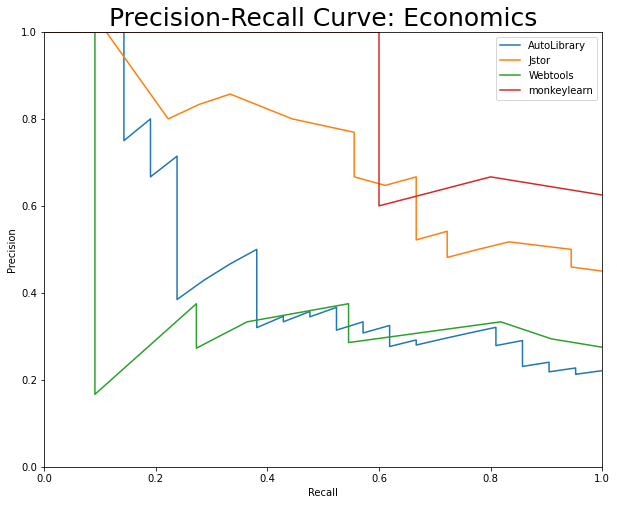

In [54]:
# graph
utils.graph_precision_recall(autophrase_econ_labels, autophrase_econ_df,
    jstor_econ_labels, jstor_econ_phrases, 
    webtools_econ_labels, webtools_econ_phrases,
    monkeylearn_econ_labels, monkeylearn_econ_phrases, "Economics")

## Electrical Engineering and Systems Science

### AutoLibrary

In [70]:
autophrase_eess_df = weighted_df['Electrical Engineering and Systems Science'].dropna().head(100)
autophrase_eess_df

,phrase,score
0,magnetic resonance,0.892167
1,deep learning,0.828240
2,fine tuning,0.696476
3,multi coil,0.695884
4,cine mri,0.692821
...,...,...
95,general,0.313608
96,domain,0.311901
97,encoding,0.310908
98,materials and methods,0.309510


In [71]:
autophrase_eess_df.iloc[90:100]

,phrase,score
90,architecture,0.324693
91,output,0.321052
92,order,0.317956
93,methods,0.317363
94,complexity,0.315892
95,general,0.313608
96,domain,0.311901
97,encoding,0.310908
98,materials and methods,0.309510
99,stage,0.304456


In [72]:
autophrase_eess_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                         1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
                         1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
                         0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
                         0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
                         0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
                         1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
                         1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 
                         0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Jstor

In [56]:
# score
jstor_eess_phrases = {"Imaging": 0.3,
"Computer networking": 0.6,
"Machine learning": 0.85,
"Image reconstruction": 0.9,
"Nuclear magnetic resonance": 0.9,
"Toilet training": 0.2,
"Systems librarians": 0.15,
"ARPA computer network": 0.8,
"Anthropic principle": 0.7,
"Astronomical cosmology": 0.9,
                      
"Artificial neural networks": 0.75,
"Astronomical spectroscopy": 0.75,
"Bayesian analysis": 0.65,
"Community structure": 0.3,
"Citation indexes": 0.1,
"Bayesian networks": 0.45,
"Diagnostic imaging": 0.4,
"Data models": 0.5,
"Electrical networks": 0.87,
"Fractals": 0.3,
                      
"Functional neuroimaging": 0.8,
"Image files": 0.2,
"Human biology": 0.1,
"Hilbert spaces": 0.9,
"Images": 0.1, 
"Inverse problems": 0.6,
"Logic circuits": 0.88,
"Kalman filters": 0.95,
"Magnetic resonance angiography": 0.7, 
"Magnetic resonance imaging": 0.7,
                      
"Multilevel marketing": 0.35, 
"Microvessels": 0.7,
"Mathematical objects": 0.15,
"Network topology": 0.7,
"Neuroscience": 0.85,
"Online social networking": 0.7,
"RLC circuits": 0.9,
"Radiology": 0.8,
"Particle image velocimetry": 0.75,
"Spacetime": 0.3}

In [57]:
jstor_eess_labels = [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 
                    1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
                    0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
                    0, 0, 0, 1, 1, 0, 1, 1, 0, 1]

### Webtools

In [63]:
webtools_eess_phrases = {"of the": 127,
"in the": 56,
"for the": 30,
"can be": 29,
"the network": 28,
"the cnnblock": 28,
"to the": 27,
"and the": 27,
"as well": 26,
"the proposed": 25,
                         
"and ncg": 25,
"number of": 24,
"our proposed": 23,
"the entire": 21,
"network architecture": 20,
"as well as": 19,
"in terms of": 18,
"of the cnnblock": 18,
"to be": 17,
"note that": 17,
                         
"the entire network": 16,
"m 1": 16,
"reconstruction network": 15,
"ah i": 15,
"as the": 14,
"the training": 14,
"kspace data": 13,
"on the": 13,
"by the": 13,
"radial spokes": 13,
                         
"1 and": 13,
"that the": 12,
"the forward": 12,
"image reconstruction": 12,
"from the": 12,
"m 1 and": 12,
"the measured": 11,
"of our": 11,
"proposed method": 11,
"proposed cnnblock": 11
}

In [65]:
# standardize it
webtools_eess_phrases = utils.min_max_scale(webtools_eess_phrases)
webtools_eess_phrases

{'of the': 1.0,
 'in the': 0.3879310344827586,
 'for the': 0.16379310344827586,
 'can be': 0.15517241379310345,
 'the network': 0.14655172413793102,
 'the cnnblock': 0.14655172413793102,
 'to the': 0.13793103448275862,
 'and the': 0.13793103448275862,
 'as well': 0.12931034482758622,
 'the proposed': 0.1206896551724138,
 'and ncg': 0.1206896551724138,
 'number of': 0.11206896551724138,
 'our proposed': 0.10344827586206896,
 'the entire': 0.08620689655172414,
 'network architecture': 0.07758620689655173,
 'as well as': 0.06896551724137931,
 'in terms of': 0.0603448275862069,
 'of the cnnblock': 0.0603448275862069,
 'to be': 0.05172413793103448,
 'note that': 0.05172413793103448,
 'the entire network': 0.04310344827586207,
 'm 1': 0.04310344827586207,
 'reconstruction network': 0.034482758620689655,
 'ah i': 0.034482758620689655,
 'as the': 0.02586206896551724,
 'the training': 0.02586206896551724,
 'kspace data': 0.017241379310344827,
 'on the': 0.017241379310344827,
 'by the': 0.017241

In [64]:
webtools_eess_labels = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                       1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
len(webtools_eess_labels) == len(webtools_eess_phrases)

True

### MonkeyLearn

In [67]:
monkeylearn_eess_phrases = {"cine mr image": 0.95,
"mr image reconstruction": 0.9,
"cnn": 0.4,
"proposed methods": 0.15,
"test time": 0.25,
"block": 0.1,
"proposed cnn": 0.45,
"number of radial": 0.55,
"entire network": 0.7,
"radial spoke": 0.65}

In [68]:
monkeylearn_eess_labels = [1, 1, 1, 0, 0, 0, 0, 0, 1, 1]

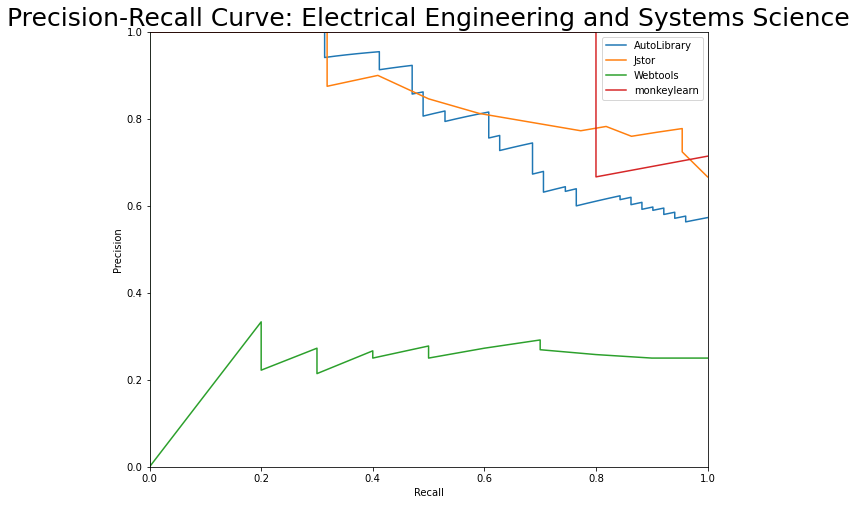

In [73]:
# graph
utils.graph_precision_recall(autophrase_eess_labels, autophrase_eess_df,
    jstor_eess_labels, jstor_eess_phrases, 
    webtools_eess_labels, webtools_eess_phrases,
    monkeylearn_eess_labels, monkeylearn_eess_phrases, "Electrical Engineering and Systems Science")

## Mathematics

### AutoLibrary

In [74]:
autophrase_math_df = weighted_df['Mathematics'].dropna().head(100)
autophrase_math_df

,phrase,score
0,state space,0.907407
1,initial state,0.876937
2,policy gradient,0.825594
3,lower bounds,0.820748
4,upper bounds,0.760767
...,...,...
95,theorem,0.381741
96,actions,0.380851
97,distribution,0.379415
98,appendix,0.379024


In [75]:
autophrase_math_df.iloc[90:100]

,phrase,score
90,pg,0.384995
91,mdp,0.384347
92,line,0.383398
93,observation,0.382639
94,decreasing,0.382006
95,theorem,0.381741
96,actions,0.380851
97,distribution,0.379415
98,appendix,0.379024
99,bound,0.378941


In [76]:
autophrase_math_labels = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
                         1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
                         1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 
                         1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
                         1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 
                         0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
                         1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
                         0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
                         1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

### Jstor

In [78]:
# score
jstor_math_phrases = ["Policy making",
"Power functions",
"Quantitative genetics",
"Newtons method",
"Mathematical induction",
"Work functions",
"Too big to fail policy",
"Resuscitation orders", 
"Rational functions",
"Stochastic processes",
                      
"Public policy", 
"Probability distributions",
"Piecewise continuous functions",
"Polynomials",
"Pareto efficiency",
"Oxygen consumption",
"One to one functions",
"Nonstandard analysis",
"Mental health policy",
"Mathematical problems",
                      
"Mathematical continuity",
"Markov chains",
"Mathematical completeness",
"Machine learning",
"Log buildings",
"Lattice theory",
"International environmental policy",
"International trade policy",
"Information policy",
"Homeowners insurance",
                      
"Hilbert spaces",
"Environmental policy",
"Formal languages",
"Function words",
"Entropy",
"Crime control",
"Claims made policies",
"Area function",
"Artificial neural networks",
"Central limit theorem"]

In [79]:
jstor_math_labels = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
                    0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
                    1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
                    1, 0, 0, 0, 1, 0, 0, 1, 1, 1]

### Webtools

In [84]:
webtools_math_phrases = {"s 1": 70,
"s0 t": 56,
"1 2": 52,
"for any": 51,
"v s": 48,
"s s0": 46,
"of the": 40,
"s s0 t": 35,
"proof of": 33,
"1 1": 31,
                         
"for all": 31,
"s 2": 30,
"s h": 29,
"with the": 26,
"2 s": 25,
"and any": 24,
"any t": 24,
"one has": 23,
"sk s": 23,
"any s": 22,
                         
"sk s s0": 21,
"1 s": 21,
"p sk": 21,
"a1 1": 20,
"and the": 19,
"the proof": 19,
"the last": 19,
"and any t": 19,
"s1 s": 19,
"sk s s0 t": 19,
                         
"the following": 18,
"ta1 s": 18,
"s 3": 18,
"we have": 18,
"for any s": 18,
"all t": 18,
"that v": 18,
"p s0": 18,
"p sk s": 18,
"t p": 18}

In [83]:
# standardize it
webtools_math_phrases = utils.min_max_scale(webtools_math_phrases)
webtools_math_phrases

{'s 1': 1.0,
 's0 t': 0.7307692307692307,
 '1 2': 0.6538461538461539,
 'for any': 0.6346153846153846,
 'v s': 0.5769230769230769,
 's s0': 0.5384615384615384,
 'of the': 0.4230769230769231,
 's s0 t': 0.3269230769230769,
 'proof of': 0.28846153846153844,
 '1 1': 0.25,
 'for all': 0.25,
 's 2': 0.23076923076923078,
 's h': 0.21153846153846154,
 'with the': 0.15384615384615385,
 '2 s': 0.1346153846153846,
 'and any': 0.11538461538461539,
 'any t': 0.11538461538461539,
 'one has': 0.09615384615384616,
 'sk s': 0.09615384615384616,
 'any s': 0.07692307692307693,
 'sk s s0': 0.057692307692307696,
 '1 s': 0.057692307692307696,
 'p sk': 0.057692307692307696,
 'a1 1': 0.038461538461538464,
 'and the': 0.019230769230769232,
 'the proof': 0.019230769230769232,
 'the last': 0.019230769230769232,
 'and any t': 0.019230769230769232,
 's1 s': 0.019230769230769232,
 'sk s s0 t': 0.019230769230769232,
 'the following': 0.0,
 'ta1 s': 0.0,
 's 3': 0.0,
 'we have': 0.0,
 'for any s': 0.0,
 'all t': 0.0,

In [82]:
webtools_math_labels = [0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
                       1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                       1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
len(webtools_math_labels) == len(webtools_math_phrases)

True

### MonkeyLearn

In [ ]:
monkeylearn_math_phrases = ["softmax pg methods",
"proof of lemma",
"lemma",
"a0",
"natural policy gradient",
"a1",
"a1 a2 a1",
"a2 a1 a2",
"a1 a2 a0",
"last inequality"]

In [ ]:
monkeylearn_math_labels = [1, 0, 1, 0, 1, 0, 0, 0, 0, 0]

In [ ]:
# graph
utils.graph_precision_recall(autophrase_math_labels, autophrase_math_df,
    jstor_math_labels, jstor_math_phrases, 
    webtools_math_labels, webtools_math_phrases,
    monkeylearn_math_labels, monkeylearn_math_phrases, "Mathematics")

## Physics

### AutoLibrary

In [ ]:
autophrase_physics_df = weighted_df['Physics'].dropna().head(100)
autophrase_physics_df

In [ ]:
autophrase_physics_df.iloc[90:100]

In [ ]:
autophrase_physics_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                            0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 
                            1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 
                            0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
                            0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
                            0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
                            1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 
                            0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 
                            0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

### Jstor

In [ ]:
# score
jstor_physics_phrases = {}

In [ ]:
jstor_physics_labels = []

### Webtools

In [ ]:
webtools_physics_phrases = {}

In [ ]:
# standardize it
webtools_physics_phrases = utils.min_max_scale(webtools_physics_phrases)
webtools_physics_phrases

In [ ]:
webtools_physics_labels = []
len(webtools_physics_labels) == len(webtools_physics_phrases)

### MonkeyLearn

In [ ]:
monkeylearn_physics_phrases = {}

In [ ]:
monkeylearn_physics_labels = []

In [ ]:
# graph
utils.graph_precision_recall(autophrase_physics_labels, autophrase_physics_df,
    jstor_physics_labels, jstor_physics_phrases, 
    webtools_physics_labels, webtools_physics_phrases,
    monkeylearn_physics_labels, monkeylearn_physics_phrases, "Physics")

## Quantitative Biology

### AutoLibrary

In [ ]:
autophrase_qbio_df = weighted_df['Quantitative Biology'].dropna().head(100)
autophrase_qbio_df

In [ ]:
autophrase_qbio_df.iloc[90:100]

In [ ]:
autophrase_qbio_labels = [1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
                         1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
                         1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
                         0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
                         0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                         0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 
                         0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
                         1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
                         0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
                         1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Jstor

In [ ]:
# score
jstor_qbio_phrases = {}

In [ ]:
jstor_qbio_labels = []

### Webtools

In [ ]:
webtools_qbio_phrases = {}

In [ ]:
# standardize it
webtools_qbio_phrases = utils.min_max_scale(webtools_qbio_phrases)
webtools_qbio_phrases

In [ ]:
webtools_qbio_labels = []
len(webtools_qbio_labels) == len(webtools_qbio_phrases)

### MonkeyLearn

In [ ]:
monkeylearn_qbio_phrases = {}

In [ ]:
monkeylearn_qbio_labels = []

In [ ]:
# graph
utils.graph_precision_recall(autophrase_qbio_labels, autophrase_qbio_df,
    jstor_qbio_labels, jstor_qbio_phrases, 
    webtools_qbio_labels, webtools_qbio_phrases,
    monkeylearn_qbio_labels, monkeylearn_qbio_phrases, "Quantitative Biology")

## Quantitative Finance

In [ ]:
autophrase_qfin_df = weighted_df['Quantitative Finance'].dropna().head(100)
autophrase_qfin_df

In [ ]:
autophrase_qfin_df.iloc[90:100]

In [ ]:
autophrase_qbio_labels = [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 
                         1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
                         0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
                         0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 
                         0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
                         1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
                         1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                         0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
                         1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Jstor

In [ ]:
# score
jstor_qfin_phrases = {}

In [ ]:
jstor_qfin_labels = []

### Webtools

In [ ]:
webtools_qfin_phrases = {}

In [ ]:
# standardize it
webtools_qfin_phrases = utils.min_max_scale(webtools_qfin_phrases)
webtools_qfin_phrases

In [ ]:
webtools_qfin_labels = []
len(webtools_qfin_labels) == len(webtools_qfin_phrases)

### MonkeyLearn

In [ ]:
monkeylearn_qfin_phrases = {}

In [ ]:
monkeylearn_qfin_labels = []

In [ ]:
# graph
utils.graph_precision_recall(autophrase_qfin_labels, autophrase_qfin_df,
    jstor_qfin_labels, jstor_qfin_phrases, 
    webtools_qfin_labels, webtools_qfin_phrases,
    monkeylearn_qfin_labels, monkeylearn_qfin_phrases, "Quantitative Finance")

## Statistics

### AutoLibrary

In [ ]:
autophrase_stat_df = weighted_df['Statistics'].dropna().head(100)
autophrase_stat_df

In [ ]:
autophrase_stat_df.iloc[90:100]

In [ ]:
autophrase_stat_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
                         0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
                         1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 
                         0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                         1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
                         1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
                         0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
                         1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                         0, 1, 0, 1, 0, 0, 0, 0, 1, 0]

### Jstor

In [ ]:
# score
jstor_stat_phrases = {}

In [ ]:
jstor_stat_labels = []

### Webtools

In [ ]:
webtools_stat_phrases = {}

In [ ]:
# standardize it
webtools_stat_phrases = utils.min_max_scale(webtools_stat_phrases)
webtools_stat_phrases

In [ ]:
webtools_stat_labels = []
len(webtools_stat_labels) == len(webtools_stat_phrases)

### MonkeyLearn

In [ ]:
monkeylearn_stat_phrases = {}

In [ ]:
monkeylearn_stat_labels = []

In [ ]:
# graph
utils.graph_precision_recall(autophrase_stat_labels, autophrase_stat_df,
    jstor_stat_labels, jstor_stat_phrases, 
    webtools_stat_labels, webtools_stat_phrases,
    monkeylearn_stat_labels, monkeylearn_stat_phrases, "Statistics")